In this notebook, I have built a neural network model from scratch to classify images of American Sign Language (ASL) signs. The goal is to implement the neural network with minimal dependencies, using only NumPy for mathematical operations, Pandas for data handling, and Matplotlib for visualization. 

This approach allows for a deep understanding of neural network mechanics, including :

forward propagation, 

backward propagation, 

L2 regularization, 

learning rate decay, 

and early stopping techniques.

In [162]:
# Libraries used
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

Dataset Overview
The dataset used here is the Sign Language MNIST dataset, which contains grayscale images of hand gestures for the letters A-Z (except J and Z due to their motion-based nature). Each image is 28x28 pixels, and the dataset includes a training set and a test set:

Training Set: Contains labeled images used for training the model. Each row has a label (0-24) and pixel values (784 values per image, as 28x28 images are flattened).

In [163]:
data=pd.read_csv("C:\\Users\\ADHYATMA SHARMA\\Downloads\\Sign_language\\archive\\sign_mnist_train\\sign_mnist_train.csv")
data.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179


We have 25 (0 to 25) labels one for each alphabet (A-Z). 

In [164]:
data["label"].unique()

array([ 3,  6,  2, 13, 16,  8, 22, 18, 10, 20, 17, 19, 21, 23, 24,  1, 12,
       11, 15,  4,  0,  5,  7, 14], dtype=int64)

In [165]:
data.shape

(27455, 785)

# Data Preprocessing
The dataset is read as a DataFrame, converted to a NumPy array, and shuffled to ensure randomness in the order of samples.

Normalization: The pixel values are divided by 255 to scale them to a [0, 1] range, which helps stabilize the network's learning process.

Data Splitting: The first 5000 samples are set aside as the validation set, while the remaining samples form the training set.

In [166]:
# Data is loaded as a CSV file and converted to a NumPy array. m = rows (examples), and n = columns (features).
data = np.array(data)

m, n = data.shape

np.random.shuffle(data) # shuffle before splitting into dev and training sets

data_dev = data[0:5000].T # validation data
Y_dev = data_dev[0]
X_dev = data_dev[1:n]
X_dev = X_dev / 255.

data_train = data[5000:m].T # Train data
Y_train = data_train[0]
X_train = data_train[1:n]
X_train = X_train / 255.
_,m_train = X_train.shape

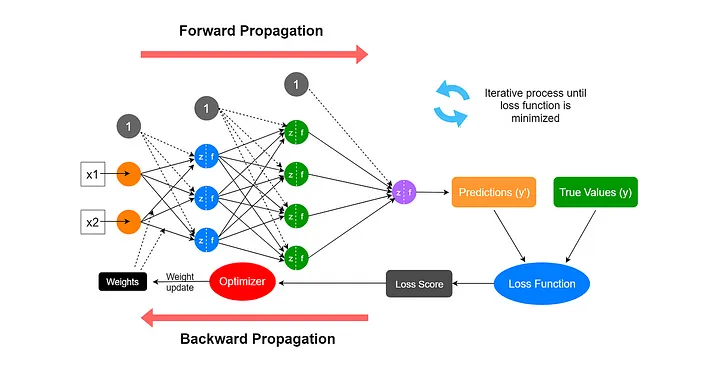

Layers and Weights in the Neural Network Model
Our neural network model consists of two primary layers: a hidden layer and an output layer. Each layer has its own set of weights and biases, which are optimized during training to accurately classify the images in the dataset.

1. Input Layer
    Shape: Each input image is flattened into a 784-dimensional vector (since each 28x28 grayscale image has 784 pixels).

    Role: The input layer simply holds the pixel data for the network. There are no weights associated with this layer as it directly passes the input to the first hidden layer.

2. Hidden Layer
    Layer 1: Computes Z1 = W1 * X + b1 followed by a ReLU activation to introduce non-linearity.

    Number of Units (Neurons): 52
    Weights (W1): A weight matrix with dimensions (52, 784), where each row corresponds to the weights connected to a single hidden neuron from all 784 input features.

    Biases (b1): A bias vector with dimensions (52, 1), where each element is the bias term for a corresponding neuron in the hidden layer.

    Activation Function: ReLU (Rectified Linear Unit) is applied to the hidden layer's output to introduce non-linearity, helping the model learn complex patterns.

    Purpose: The hidden layer captures relationships between pixels in the image that may indicate certain shapes or patterns characteristic of ASL letters.

3. Output Layer
    Layer 2: Computes Z2 = W2 * A1 + b2 followed by softmax to output class probabilities.
    
    Number of Units: 25 (corresponding to 25 possible classes, one for each letter in the ASL alphabet excluding J and Z).

    Weights (W2): A weight matrix with dimensions (25, 52), connecting each hidden neuron to every output neuron. Each row represents the weights associated with one output class across all hidden layer neurons.

    Biases (b2): A bias vector with dimensions (25, 1), where each element is the bias for a corresponding class neuron in the output layer.

    Activation Function: Softmax is applied to the output layer, which converts raw scores to probabilities across the 25 classes, allowing us to interpret the network’s output as class probabilities.

    Purpose: The output layer aggregates information learned in the hidden layer and produces a prediction vector for classifying the input image.

Softmax Activation :\
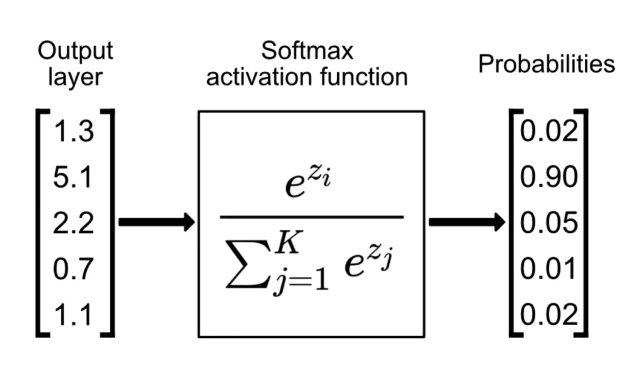

In [167]:
# Creting variables for the layers of NN:
def init_params():
    W1 = np.random.rand(52, 784) - 0.5
    b1 = np.random.rand(52, 1) - 0.5
    W2 = np.random.rand(25, 52) - 0.5
    b2 = np.random.rand(25, 1) - 0.5
    return W1, b1, W2, b2

# Function for ReLU which returns positive input or zero as return value:
def ReLU(Z):
    return np.maximum(Z, 0)

# Activation function for output layer to convert our computation into pobabilities:
def softmax(Z):
    A = np.exp(Z) / sum(np.exp(Z))
    return A
 
# Forward popogation :   
def forward_prop(W1, b1, W2, b2, X):
    Z1 = W1.dot(X) + b1
    A1 = ReLU(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2

# Derivative of ReLU for backpropogation :
def ReLU_deriv(Z):
    return Z > 0


# Explanation of One-Hot Encoding
# The one_hot function is used to convert the labels (class indices) for each data point into a one-hot encoded format. 
# This is necessary for the cross-entropy loss calculation when working with multi-class classification problems, such as in this ASL letter classification task.

def one_hot(Y):
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y



Backpropagation and L2 Regularization:\
Objective: Minimize the cross-entropy loss function by computing gradients for each parameter.\
L2 Regularization: Adds a penalty term to the weight gradients, encouraging the model to keep weights smaller and thereby reducing overfitting.\

Gradients Computation:\
For output layer: Computes gradients for weights and biases in the output layer (W2, b2).\
For hidden layer: Uses ReLU derivative to compute gradients for weights and biases in the hidden layer (W1, b1).

In [168]:
def backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y,lambda_reg=0.01):
    one_hot_Y = one_hot(Y)
    dZ2 = A2 - one_hot_Y
    # dW2 = 1 / m * dZ2.dot(A1.T) #Without L2
    dW2 = 1 / m * dZ2.dot(A1.T) + (lambda_reg / m) * W2  # Add L2 regularization
    db2 = 1 / m * np.sum(dZ2)
    dZ1 = W2.T.dot(dZ2) * ReLU_deriv(Z1)
    # dW1 = 1 / m * dZ1.dot(X.T) # without L2 
    dW1 = 1 / m * dZ1.dot(X.T) + (lambda_reg / m) * W1  # Add L2 regularization
    db1 = 1 / m * np.sum(dZ1)
    return dW1, db1, dW2, db2

def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1    
    W2 = W2 - alpha * dW2  
    b2 = b2 - alpha * db2    
    return W1, b1, W2, b2

In [169]:
# This function retrieves the predicted class for each input sample by identifying the index of the highest probability output from the softmax layer (A2).
def get_predictions(A2):
    return np.argmax(A2, 0)

#This function calculates the accuracy of the model by comparing its predictions with the true labels probability.
def get_accuracy(predictions, Y):
    print(predictions, Y)
    return np.sum(predictions == Y) / Y.size
    
# This function performs forward propagation on the input X using the model’s weights (W1, b1, W2, b2) and returns the predicted class for each sample.
def make_predictions(X, W1, b1, W2, b2):
    _, _, _, A2 = forward_prop(W1, b1, W2, b2, X)
    predictions = get_predictions(A2)
    return predictions


Summary of Key Components:

1. Early Stopping: The function halts training if validation accuracy doesn’t improve for a specified number of epochs (patience). This prevents overfitting and saves computation time.

2. Learning Rate Decay: After every decay_every epochs, the learning rate (alpha) is scaled by decay_rate, gradually reducing the step size to refine model updates as training progresses.

3. Tracking Accuracy: Both training and validation accuracies are stored for each epoch, allowing for visualization of model performance over time.

4. Restoring Best Weights: The model weights are reverted to the ones that yielded the best validation accuracy before returning.

In [184]:
# Set early stopping parameters
patience = 500  # Maximum number of epochs with no improvement before stopping
best_val_accuracy = 0  # Track the best validation accuracy seen so far
best_weights = None  # Store the model weights corresponding to the best validation accuracy
epochs_no_improve = 0  # Counter for epochs without improvement in validation accuracy

# Store accuracy history for plotting
train_accuracies = []  # List to keep track of training accuracy over epochs
val_accuracies = []  # List to keep track of validation accuracy over epochs

# Gradient descent function with early stopping and learning rate decay
def gradient_descent_with_early_stopping(X_train, Y_train, X_val, Y_val, initial_alpha, epochs, decay_rate, decay_every):
    global best_val_accuracy, best_weights, epochs_no_improve
    W1, b1, W2, b2 = init_params()  # Initialize weights and biases
    m = X_train.shape[1]  # Number of training examples
    alpha = initial_alpha  # Set the initial learning rate

    for epoch in range(epochs):
        # Forward propagation on the training set
        Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X_train)

        # Backward propagation to calculate gradients
        dW1, db1, dW2, db2 = backward_prop(Z1, A1, Z2, A2, W1, W2, X_train, Y_train)

        # Update weights and biases with gradient descent
        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)

        # Apply learning rate decay every 'decay_every' epochs
        if (epoch + 1) % decay_every == 0:
            alpha *= decay_rate  # Multiply alpha by decay rate to reduce learning rate

        # Calculate training accuracy
        train_predictions = make_predictions(X_train, W1, b1, W2, b2)
        train_accuracy = np.mean(train_predictions == Y_train)  # Average accuracy across training samples
        train_accuracies.append(train_accuracy)  # Append to list for plotting later

        # Calculate validation accuracy
        val_predictions = make_predictions(X_val, W1, b1, W2, b2)
        val_accuracy = np.mean(val_predictions == Y_val)  # Average accuracy across validation samples
        val_accuracies.append(val_accuracy)  # Append to list for plotting later

        # Print accuracy and learning rate at specified intervals
        if epoch % decay_every == 0:
            print(f"Epoch {epoch}: Train Accuracy = {train_accuracy * 100:.2f}% | Validation Accuracy = {val_accuracy * 100:.2f}% | Learning Rate = {alpha:.5f}")

        # Early stopping condition: Check if validation accuracy has improved
        if val_accuracy > best_val_accuracy:
            best_val_accuracy = val_accuracy  # Update the best validation accuracy
            best_weights = (W1, b1, W2, b2)  # Store weights with the best validation accuracy
            epochs_no_improve = 0  # Reset counter since accuracy improved
        else:
            epochs_no_improve += 1  # Increment counter if no improvement

        # If no improvement for 'patience' epochs, stop training early
        if epochs_no_improve >= patience:
            print(f"Early stopping triggered at epoch {epoch}")
            break

    # After training, restore weights to those with the best validation accuracy
    W1, b1, W2, b2 = best_weights
    return W1, b1, W2, b2  # Return final weights and biases


Epoch 0: Train Accuracy = 5.94% | Validation Accuracy = 6.16% | Learning Rate = 0.05000
Epoch 250: Train Accuracy = 28.64% | Validation Accuracy = 28.04% | Learning Rate = 0.04500
Epoch 500: Train Accuracy = 45.59% | Validation Accuracy = 45.52% | Learning Rate = 0.04050
Epoch 750: Train Accuracy = 55.32% | Validation Accuracy = 54.32% | Learning Rate = 0.03645
Epoch 1000: Train Accuracy = 61.24% | Validation Accuracy = 60.48% | Learning Rate = 0.03281
Epoch 1250: Train Accuracy = 65.35% | Validation Accuracy = 64.30% | Learning Rate = 0.02952
Epoch 1500: Train Accuracy = 68.18% | Validation Accuracy = 66.64% | Learning Rate = 0.02657
Epoch 1750: Train Accuracy = 70.52% | Validation Accuracy = 69.44% | Learning Rate = 0.02391
Epoch 2000: Train Accuracy = 72.38% | Validation Accuracy = 71.34% | Learning Rate = 0.02152
Epoch 2250: Train Accuracy = 73.66% | Validation Accuracy = 72.42% | Learning Rate = 0.01937
Epoch 2500: Train Accuracy = 74.87% | Validation Accuracy = 73.48% | Learning 

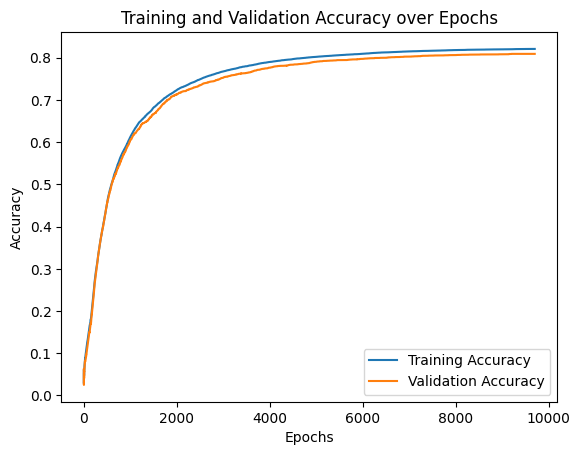

In [185]:
# Train the model with early stopping
W1, b1, W2, b2 = gradient_descent_with_early_stopping(X_train, Y_train, X_dev, Y_dev, initial_alpha=0.05, epochs=10001, decay_rate=0.9, decay_every=250)

# Plot accuracy vs epochs
plt.plot(range(len(train_accuracies)), train_accuracies, label='Training Accuracy')
plt.plot(range(len(val_accuracies)), val_accuracies, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy over Epochs')
plt.show()

Checking some samples:

Prediction:  [16]
Label:  16


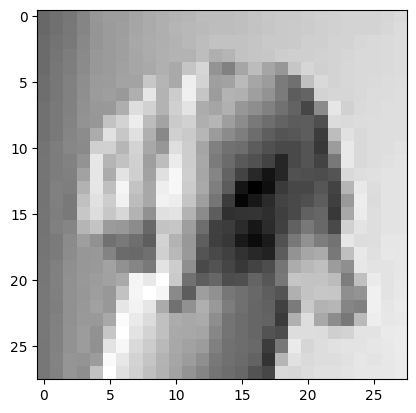

Prediction:  [5]
Label:  5


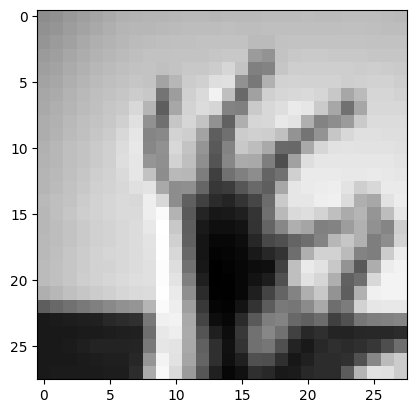

In [190]:
def make_predictions(X, W1, b1, W2, b2):
    _, _, _, A2 = forward_prop(W1, b1, W2, b2, X)
    predictions = get_predictions(A2)
    return predictions

def test_prediction(index, W1, b1, W2, b2):
    current_image = X_train[:, index, None]
    prediction = make_predictions(X_train[:, index, None], W1, b1, W2, b2)
    label = Y_train[index]
    print("Prediction: ", prediction)
    print("Label: ", label)
    
    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

test_prediction(0, W1, b1, W2, b2)
test_prediction(1, W1, b1, W2, b2)

Importing Test CSV

In [191]:
test_data=pd.read_csv("C:\\Users\\ADHYATMA SHARMA\\Downloads\\Sign_language\\archive\\sign_mnist_test\\sign_mnist_test.csv")
test_data.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,6,149,149,150,150,150,151,151,150,151,...,138,148,127,89,82,96,106,112,120,107
1,5,126,128,131,132,133,134,135,135,136,...,47,104,194,183,186,184,184,184,182,180
2,10,85,88,92,96,105,123,135,143,147,...,68,166,242,227,230,227,226,225,224,222
3,0,203,205,207,206,207,209,210,209,210,...,154,248,247,248,253,236,230,240,253,255
4,3,188,191,193,195,199,201,202,203,203,...,26,40,64,48,29,46,49,46,46,53


Scaling test data :

In [192]:
# Separate features and labels, and preprocess
X_test = test_data.drop("label", axis=1).values.T  # Transpose to match input shape
X_test = X_test / 255.0  # Normalize pixel values
Y_test = test_data["label"].values  # Actual labels


Evaluating Test accurcacy:

In [193]:
# Function to evaluate model accuracy on the test set
def evaluate_test_set(X_test, Y_test, W1, b1, W2, b2):
    _, _, _, A2 = forward_prop(W1, b1, W2, b2, X_test)
    predictions = get_predictions(A2)
    accuracy = get_accuracy(predictions, Y_test)
    print("Test Set Accuracy:", accuracy)

# Call the function using trained weights
evaluate_test_set(X_test, Y_test, W1, b1, W2, b2)

[ 6 20 10 ...  2  4  2] [ 6  5 10 ...  2  4  2]
Test Set Accuracy: 0.6143335192414947
